In [30]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

sns.set_theme(style='whitegrid', palette='colorblind')

確率的勾配降下法

- どんな問題を扱うアルゴリズム？
->解析的に解が得られない問題に対して，最適解を求めるためのアルゴリズム

- 入力と出力は？
->fitでは，入力：データ 出力：パラメータ
->predictでは，入力：データ 出力：予測値

- どのような操作が行われている？
   - パラメータの初期値を設定
   - データからサンプリング
   - 

In [25]:
# シードを固定
np.random.seed(0)

# ダミーデータを生成
x = np.linspace(25, 35, 50)
noise = np.random.normal(0, 1, size=x.shape)
y = 2 * x + 1 + noise

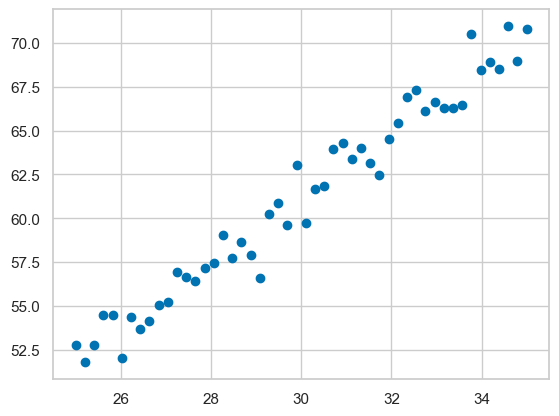

In [147]:
plt.plot(x, y, 'o')

In [245]:
class SGD:
    def __init__(self, lr: float = 0.001, max_iter: int = 300):
        self.lr = lr
        self.a = np.random.normal(0, 1)
        self.b = np.random.normal(0, 1)
        self.max_iter = max_iter

    def fit(self, x, y, sampling_num: int=1):
        for _ in range(self.max_iter):
            sample = np.random.randint(0, x.shape[0], sampling_num)
            x_ = x[sample]
            y_ = y[sample]
            l = self.predict(x_) - y_

            self.a = self.a - self.lr * l*x_
            self.b = self.b - self.lr * l

    def predict(self, x):
        return self.a * x + self.b

In [275]:
model = SGD()
model.fit(x, y)
print(model.a, model.b)

[2.02568061] [0.33333258]


In [247]:
model.predict(x)

array([51.30276871, 51.71202579, 52.12128286, 52.53053993, 52.939797  ,
       53.34905408, 53.75831115, 54.16756822, 54.5768253 , 54.98608237,
       55.39533944, 55.80459651, 56.21385359, 56.62311066, 57.03236773,
       57.4416248 , 57.85088188, 58.26013895, 58.66939602, 59.0786531 ,
       59.48791017, 59.89716724, 60.30642431, 60.71568139, 61.12493846,
       61.53419553, 61.94345261, 62.35270968, 62.76196675, 63.17122382,
       63.5804809 , 63.98973797, 64.39899504, 64.80825211, 65.21750919,
       65.62676626, 66.03602333, 66.44528041, 66.85453748, 67.26379455,
       67.67305162, 68.0823087 , 68.49156577, 68.90082284, 69.31007992,
       69.71933699, 70.12859406, 70.53785113, 70.94710821, 71.35636528])